<center>Заметка 9.б Разбиение на треугольники</center>
<center>курса <q>Введение в цифровую обработку изображений</q>.</center>
<center>Шокуров Антон В.</center>
<center>shokurov.anton.v@yandex.ru</center>
<center>http://машинноезрение.рф</center>
<center>Версия 0.09<span style="color:blue">5</span></center>

<center>Аннотация</center>
<p>
...
</p>

<p>Это предварительная версия! Любые замечания приветствуются.</p>

<span style="color:blue">  
    <b>Введение</b>. 
    Из предыдущих лекций, если у нас есть две или больше камер, мы можем сделать сопоставление точек, построить их в пространстве и получить тем самым облако точек. Какой следующий шаг в трехмерном восстановлении объекта? Мы должны извлечь его текстуру.
</span>

<span style="color:blue">  
    Что такое извлечение текстуры по простому: у нас есть трехмерный объект, мы хотим извлечь ту картинку, которая была "натянута" на его грани при создании. 
</span>

<span style="color:blue"> Первый шаг для извлечения текстуры - найти плоские грани на изображении 3х мерного объекта, про это было рассказано на прошлой лекции. 
    Далее в этой лекции считаем, что мы извлекли все грани из трехмерного изображения объекта и зафиксировали среди них только одну, то есть рассматриваем только то облако точек, которое ей соответствует.</span>
  

<span style="color:blue">Следующий шаг в извлечении текстуры - <b>триангуляция</b>.</span>

<h2>Триангуляция</h2>

<span style="color:blue"> Пусть есть множество точек на плоскости, необходимо построить множество непересекающихся треугольников так, чтобы их вершинами были все эти (и только эти) точки.</span> 

<span style="color:blue"> Такая задача решается не единственным способом (пример на 4 точках), но можно рассматривать более узкие постановки (См. "Триангуляция Делоне").</span> 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import MaxNLocator

In [2]:
import scipy.spatial as spat

<h3>Двумерный случай</h3>

<b>Регулярная сетка</b>

<span style="color:blue"> Рассмотрим пример триангуляции на регулярной сетке.</span> 

In [3]:
pat_size = (3,5)

(-0.2, 4.2, -0.1, 2.1)

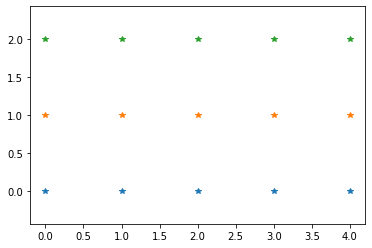

In [4]:
ind = np.indices( pat_size[::-1] )
plt.plot( ind[0], ind[1], "*" )
plt.axis('equal')

In [5]:
pnts = np.indices( pat_size ).T.reshape(-1,2)
pnts.shape

(15, 2)

Запустим триангуляцию для регулярной сетки.

In [6]:
trngls = spat.Delaunay( pnts )

Возращается список треугольников. 

<span style="color:blue"> Функция сделана для общего n-мерного случая и может выдавать симплексы другой размерности. </span> 

In [7]:
trngls.simplices.shape

(16, 3)

In [8]:
# Треугольники задаются тройками индексов.
trngls.simplices

array([[ 1,  3,  0],
       [ 3,  1,  4],
       [ 6,  3,  7],
       [ 3,  4,  7],
       [ 9, 13, 12],
       [13,  9, 10],
       [ 9,  6,  7],
       [10,  9,  7],
       [ 1,  5,  4],
       [ 5,  1,  2],
       [ 4,  5,  7],
       [ 5,  8,  7],
       [11, 13, 10],
       [13, 11, 14],
       [11, 10,  7],
       [ 8, 11,  7]], dtype=int32)

В matplotlib есть специальная функция для их отрисовки.

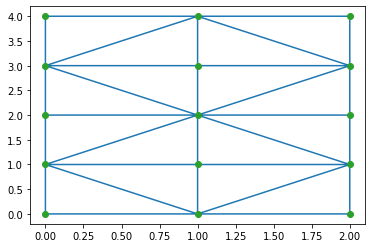

In [9]:
plt.triplot(pnts[:,0], pnts[:,1], trngls.simplices)
plt.plot(pnts[:,0], pnts[:,1], 'o');

Выделим один из треугольников отдельно.
Вручную, для понимания.

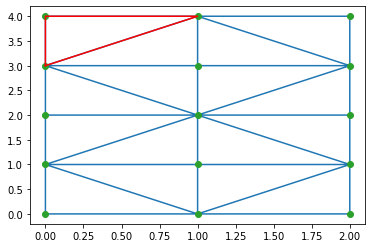

In [10]:
plt.triplot(pnts[:,0], pnts[:,1], trngls.simplices)
plt.plot(pnts[:,0], pnts[:,1], 'o')
plt.plot( [ pnts[9,0], pnts[13,0], pnts[12,0], pnts[9,0] ], [ pnts[9,1], pnts[13,1], pnts[12,1], pnts[9,1] ], 'r-');

<b>Случайный набор точек</b>

Теперь рассмотрим случайный набор точек.

In [11]:
pnts = np.dstack(
    [np.random.rand( 10 ), np.random.rand( 10 )]
)[0]
pnts.shape

(10, 2)

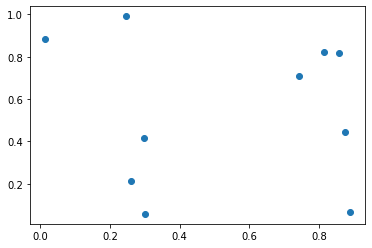

In [12]:
plt.plot(pnts[:,0], pnts[:,1], 'o');

<span style="color:blue"> Запустим триангуляцию для этого случайного набора.</span> 

In [13]:
trngls = spat.Delaunay( pnts )

<span style="color:blue"> Нарисуем эти треугольники двумя способами, встроенной функцией matplotlib и вручную.</span> 

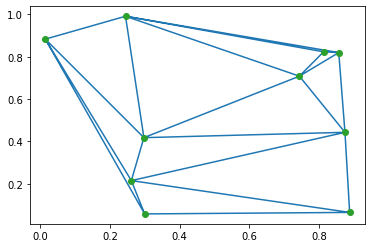

In [14]:
plt.triplot(pnts[:,0], pnts[:,1], trngls.simplices)
plt.plot(pnts[:,0], pnts[:,1], 'o');

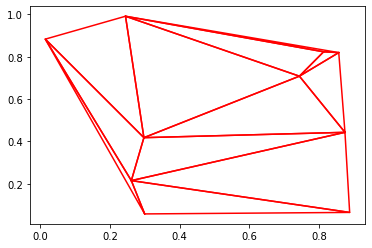

In [15]:
for tr in trngls.simplices:
    plt.plot( [ pnts[tr[0],0], pnts[tr[1],0], pnts[tr[2],0], pnts[tr[0],0] ], [ pnts[tr[0],1], pnts[tr[1],1], pnts[tr[2],1], pnts[tr[0],1] ], 'r-')

<h3>Трехмерный случай</h3>

<span style="color:blue">Если запустить функцию триангуляции на трехмерных точках, то она выдаст тетраэдры, поэтому</span>
для трехмерного пространства фактически берется проекция этих точек на плоскость и для них строится триангуляция.
Мы исходим из того, что объект без самопересечений/перекрытий, поэтому для наших облаков точек это возможно.

<span style="color:blue">Мы выбираем плоскость вдоль которой у облака точек "доминантное" поведение и проецируем на нее точки. Далее делаем триангуляцию, получаем тем самым тройки точек, а после объединяем в треугольники соответствующие точки, но в трехмерном мире.  </span>

<b>Покажем на примере графика функции</b>

<span style="color:blue"> Зададим регулярную сетку </span> точек в области x и y.

In [16]:
pnts = np.indices( (20, 20) ).T.reshape(-1,2)
pnts.shape

(400, 2)

Центрируем.

In [17]:
pnts -= [10,10]

Теперь маштабируем.

In [18]:
pnts = pnts / 2.5

In [19]:
10/2.5

4.0

In [20]:
#plt.plot(pnts[:,0], pnts[:,1], 'o');

Зададим функцию (массив значений) от двух переменных.

In [21]:
z = np.sqrt( pnts[:,0]**2 + pnts[:,1]**2 ) #np.sin( pnts[:,0] ) * np.cos( pnts[:,1] )

In [22]:
z.shape

(400,)

Сформируем массив из трехмерных точек.

In [23]:
pnts = (np.vstack( [pnts.T, z] )).T
pnts.shape

(400, 3)

<span style="color:blue">Мы получили массив трехмерных точек - точки графика функции на регулярной по x, y сетке. </span>Пример точки.

In [24]:
pnts[5]

array([-2.        , -4.        ,  4.47213595])

In [ ]:
%matplotlib widget

<span style="color:blue">Отрисуем этот набор точек.</span>

In [25]:
p3 = pnts

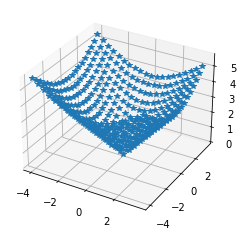

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot3D( p3[:,0], p3[:,1], p3[:,2], '*');

<span style="color:blue">Сделаем триангуляцию регулярной сетки, то есть триангуляцию проекции этих точек на плоскость x и y. Далее отрисуем восстановленные треугольники в трехмерном графике.</span>

In [27]:
h3 = pnts

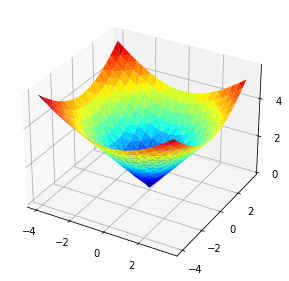

In [28]:
fig = plt.figure()
ax = fig.add_subplot( projection='3d')

surf = ax.plot_trisurf( h3[:,0], h3[:,1], h3[:,2], cmap=cm.jet, linewidth=0)

ax.xaxis.set_major_locator(MaxNLocator(5))
ax.yaxis.set_major_locator(MaxNLocator(5))
ax.zaxis.set_major_locator(MaxNLocator(3))

fig.tight_layout();

Фактически сначала делается проекция на характерную плоскость и потом запускается двумерный алгоритм.

Для нашего облака точек получаем.

<span style="color:blue">Таким способом можно отобразить поверхность (с искажениями), заданную конечным множеством точек.</span>

ДЗ. Загрузить данные из тетрадки с восстановленной цилиндрической поверхностью.

In [ ]:
h3 = data # data взять из восстановленной 3д поверхности.

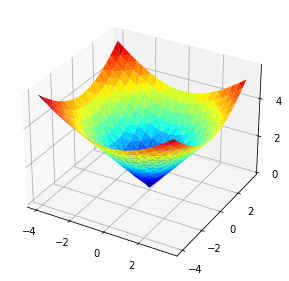

In [29]:
fig = plt.figure()
ax = fig.add_subplot( projection='3d')

surf = ax.plot_trisurf( h3[:,0], h3[:,1], h3[:,2], cmap=cm.jet, linewidth=0)

ax.xaxis.set_major_locator(MaxNLocator(5))
ax.yaxis.set_major_locator(MaxNLocator(5))
ax.zaxis.set_major_locator(MaxNLocator(3))

fig.tight_layout();